# Logistic Regression Downsampling

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
from sklearn.metrics import confusion_matrix, recall_score,classification_report
from sklearn.model_selection import KFold,cross_val_score
import seaborn as sns

In [5]:
#read in data from csv by pandas
under_sample_data=pd.read_csv('down.csv')
#separate the data set into features and stroke
X = under_sample_data.iloc[:, under_sample_data.columns!='stroke']
y = under_sample_data.iloc[:, under_sample_data.columns=='stroke']

#split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
def printing_Kfold_scores(X_train,y_train):
    #default is 5 fold
    fold=KFold(shuffle=False)
    #create a list of c parameter value for testing better result
    c_param_range = [0.01,0.1,1,10,100]
    #loop through the c_param_range to test different parameter results and list out
    for c_param in c_param_range:
        print('------------------------------')
        print('C_parameter: ',c_param)
        print('------------------------------')
        for iteration, index in enumerate(fold.split(X),start=1):
            LR = LogisticRegression(C=c_param,penalty='l2')
            LR.fit(X_train, y_train)
            y_pred = LR.predict(X_test)
            print("Accuracy ", LR.score(X_test, y_test)*100)

In [9]:
printing_Kfold_scores(X_train,y_train)

------------------------------
C_parameter:  0.01
------------------------------


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy  55.952380952380956
Accuracy  55.952380952380956
Accuracy  55.952380952380956
Accuracy  55.952380952380956
Accuracy  55.952380952380956
------------------------------
C_parameter:  0.1
------------------------------
Accuracy  61.904761904761905
Accuracy  61.904761904761905
Accuracy  61.904761904761905
Accuracy  61.904761904761905
Accuracy  61.904761904761905
------------------------------
C_parameter:  1
------------------------------
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\


------------------------------
C_parameter:  10
------------------------------
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666
------------------------------
C_parameter:  100
------------------------------
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666
Accuracy  66.66666666666666


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\

Accuracy  66.66666666666666


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


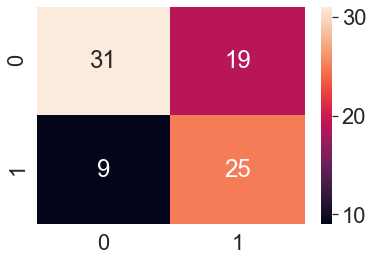

In [17]:
#set the best C parameter based on the previous testing
LR = LogisticRegression(C=1,penalty='l2')
LR.fit(X_train, y_train)
#predict results
y_pred = LR.predict(X_test)
print("Accuracy ", LR.score(X_test, y_test)*100)
sns.set(font_scale=2.0)
#create confusion matrix for heatmap plotting
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

plt.show()

0.7363636363636363

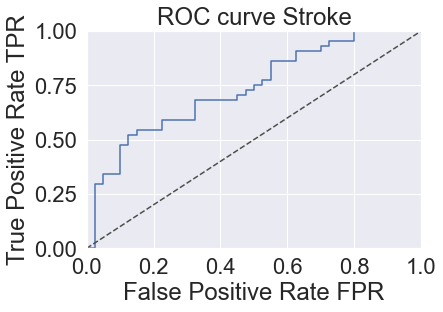

In [18]:
#for model evaluation
from sklearn.metrics import roc_curve, auc 
y_pred_quant = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
#Create AUC graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve Stroke')
plt.xlabel('False Positive Rate FPR')
plt.ylabel('True Positive Rate TPR')
plt.grid(True)

auc(fpr, tpr)

# Logistic Regression Upsampling

In [21]:
#read in upsampled data set
up_sample_data=pd.read_csv('up.csv')

X = up_sample_data.iloc[:, up_sample_data.columns!='stroke']
y = up_sample_data.iloc[:, up_sample_data.columns=='stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
printing_Kfold_scores(X_train,y_train)

------------------------------
C_parma:  0.01
------------------------------
Accuracy  70.13669821240799
Accuracy  70.13669821240799
Accuracy  70.13669821240799
Accuracy  70.13669821240799
Accuracy  70.13669821240799
------------------------------
C_parma:  0.1
------------------------------
Accuracy  70.50473186119874
Accuracy  70.50473186119874
Accuracy 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\

 70.50473186119874
Accuracy  70.50473186119874
Accuracy  70.50473186119874
------------------------------
C_parma:  1
------------------------------
Accuracy  69.61093585699264
Accuracy  69.61093585699264
Accuracy  69.61093585699264
Accuracy  69.61093585699264
Accuracy 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\

 69.61093585699264
------------------------------
C_parma:  10
------------------------------
Accuracy  69.61093585699264
Accuracy  69.61093585699264
Accuracy  69.61093585699264
Accuracy  69.61093585699264
Accuracy  69.61093585699264
------------------------------
C_parma:  100
------------------------------
Accuracy  69.61093585699264
Accuracy 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\

 69.61093585699264
Accuracy  69.61093585699264
Accuracy  69.61093585699264
Accuracy  69.61093585699264


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy  70.50473186119874


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


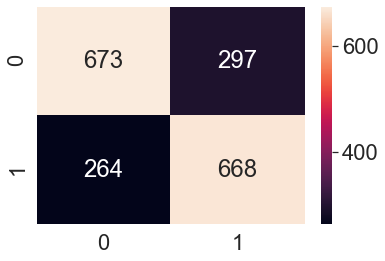

In [26]:
#same steps as downsampled data
LR = LogisticRegression(C=0.1,penalty='l2')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("Accuracy ", LR.score(X_test, y_test)*100)
sns.set(font_scale=2.0)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

plt.show()

0.7688842685010591

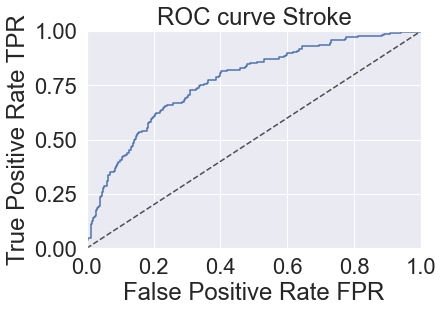

In [24]:
#same steps as downsampled data
y_pred_quant = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve Stroke')
plt.xlabel('False Positive Rate FPR')
plt.ylabel('True Positive Rate TPR')
plt.grid(True)

auc(fpr, tpr)